In [38]:
import pandas as pd
import matplotlib.pyplot as plt

#### Data Acquisition
The dataset is downloaded from Kaggle. It contains various columns, but for this project, the most relevant ones will be:

__title__: The title of the movie/series. <br/>
__description__: The plot summary of the movie/series.

In [3]:
netflix_data = pd.read_csv('data/netflix_titles.csv')

#### Data Exploration
Explore the dataset to understand its structure, look for missing values, and get a sense of the distribution of the plot summaries. Use Pandas for this:

In [4]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
netflix_data.title

0        Dick Johnson Is Dead
1               Blood & Water
2                   Ganglands
3       Jailbirds New Orleans
4                Kota Factory
                ...          
8802                   Zodiac
8803              Zombie Dumb
8804               Zombieland
8805                     Zoom
8806                   Zubaan
Name: title, Length: 8807, dtype: object

In [15]:
netflix_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Check for missing values

In [6]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [21]:
netflix_data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

Replace the missing values with a placeholder like 'Unknown'

In [26]:
netflix_data['director'].fillna('Unknown', inplace=True)
netflix_data['cast'].fillna('Unknown', inplace=True)
netflix_data['country'].fillna('Unknown', inplace=True)
netflix_data['date_added'].fillna('Unknown', inplace=True)
netflix_data['duration'].fillna('Unknown', inplace=True)

In [27]:
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### Text Preprocessing
Clean and preprocess the plot summaries to make them suitable for analysis. Typical preprocessing steps include:

- Lowercasing the text.
- Removing punctuation and special characters.
- Tokenization (splitting the text into words).
- Removing stop words (common words that do not contribute to meaning).

In [28]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Apply preprocessing
netflix_data['cleaned_description'] = netflix_data['description'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ggeorgieva.HAEMIMONT\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ggeorgieva.HAEMIMONT\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
netflix_data['cleaned_description']

0       father nears end life filmmaker kirsten johnso...
1       crossing paths party cape town teen sets prove...
2       protect family powerful drug lord skilled thie...
3       feuds flirtations toilet talk go among incarce...
4       city coaching centers known train indias fines...
                              ...                        
8802    political cartoonist crime reporter pair cops ...
8803    living alone spooky town young girl befriends ...
8804    looking survive world taken zombies dorky coll...
8805    dragged civilian life former superhero must tr...
8806    scrappy poor boy worms way tycoons dysfunction...
Name: cleaned_description, Length: 8807, dtype: object

#### Feature Extraction
Use a method to convert the plot summaries into numerical vectors that a machine learning model can understand. Common techniques include:

- TF-IDF Vectorization: This method weighs the importance of words in each document relative to the entire corpus.
- Word Embeddings: Using models like Word2Vec, GloVe, or even Sentence Transformers to capture the semantic meaning of the descriptions.
Implementing TF-IDF:

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(netflix_data['cleaned_description'])

In [31]:
tfidf_matrix

<8807x20788 sparse matrix of type '<class 'numpy.float64'>'
	with 126668 stored elements in Compressed Sparse Row format>

#### Similarity Calculation
Calculate the cosine similarity between the movie descriptions to determine how similar they are. Use the cosine similarity function from sklearn:

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a DataFrame for easy access
sim_df = pd.DataFrame(cosine_sim, index=netflix_data['title'], columns=netflix_data['title'])

In [12]:
sim_df

title,Dick Johnson Is Dead,Blood & Water,Ganglands,Jailbirds New Orleans,Kota Factory,Midnight Mass,My Little Pony: A New Generation,Sankofa,The Great British Baking Show,The Starling,...,Zak Storm,Zed Plus,Zenda,Zindagi Gulzar Hai,Zinzana,Zodiac,Zombie Dumb,Zombieland,Zoom,Zubaan
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,1.000000,0.000000,0.000000,0.000000,0.015736,0.000000,0.000000,0.000000,0.038962,0.016931,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.015586,0.000000
Blood & Water,0.000000,1.000000,0.000000,0.000000,0.000000,0.032009,0.047825,0.000000,0.000000,0.000000,...,0.031885,0.000000,0.055077,0.000000,0.0,0.000000,0.040914,0.000000,0.000000,0.000000
Ganglands,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.023118
Jailbirds New Orleans,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.015316,0.000000
Kota Factory,0.015736,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.016148,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.035568,0.066989,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.044185,0.050935,0.000000,0.0,1.000000,0.000000,0.058604,0.000000,0.000000
Zombie Dumb,0.000000,0.040914,0.000000,0.000000,0.000000,0.054967,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000
Zombieland,0.000000,0.000000,0.000000,0.000000,0.035568,0.000000,0.000000,0.000000,0.000000,0.057871,...,0.000000,0.000000,0.000000,0.043503,0.0,0.058604,0.000000,1.000000,0.000000,0.000000


#### Finding Similar Movies
Create a function to retrieve similar movies based on the cosine similarity matrix:

In [34]:
def get_similar_movies(title, sim_df, n=5):
    # Get the pairwise similarity scores of all movies with that movie
    similar_scores = sim_df[title]
    # Sort the movies based on the scores
    similar_movies = similar_scores.sort_values(ascending=False)[1:n+1]
    return similar_movies

# Example usage
print(get_similar_movies('The Crown', sim_df))

title
The Nineties                                      0.190250
Elizabeth and Margaret: Love and Loyalty          0.156474
Suffragette                                       0.154582
The Naked Gun: From the Files of Police Squad!    0.147015
Nymphomaniac: Volume II                           0.146862
Name: The Crown, dtype: float64


In [35]:
get_similar_movies('Zombie Dumb', sim_df)

title
Diablero       0.242570
Legion         0.207147
Here Alone     0.181611
Taxi Driver    0.179780
Bat Pat        0.162636
Name: Zombie Dumb, dtype: float64

In [36]:
get_similar_movies('Jaws', sim_df)

title
Jaws: The Revenge    0.441479
Jaws 2               0.439462
Jaws 3               0.224974
Maya Memsaab         0.156786
In The Deep          0.154385
Name: Jaws, dtype: float64

In [37]:
get_similar_movies('The Circle', sim_df)

title
The Circle France    0.877428
The Circle Brazil    0.411337
Ink Master           0.133507
21 Again             0.132898
The Guild            0.126254
Name: The Circle, dtype: float64

Create function plot_similar_movies() - designed to visualize the similarity between a given movie and a set of other movies based on their cosine similarity scores, which is often used in recommendation systems or content-based filtering for finding similar items.

In [39]:
def plot_similar_movies(title, similar_movies):
    plt.figure(figsize=(10, 5))
    similar_movies.plot(kind='bar', color='skyblue')
    plt.title(f'Similar Movies to {title}')
    plt.xlabel('Movie Titles')
    plt.ylabel('Cosine Similarity Score')
    plt.xticks(rotation=45, ha='right')
    plt.show()

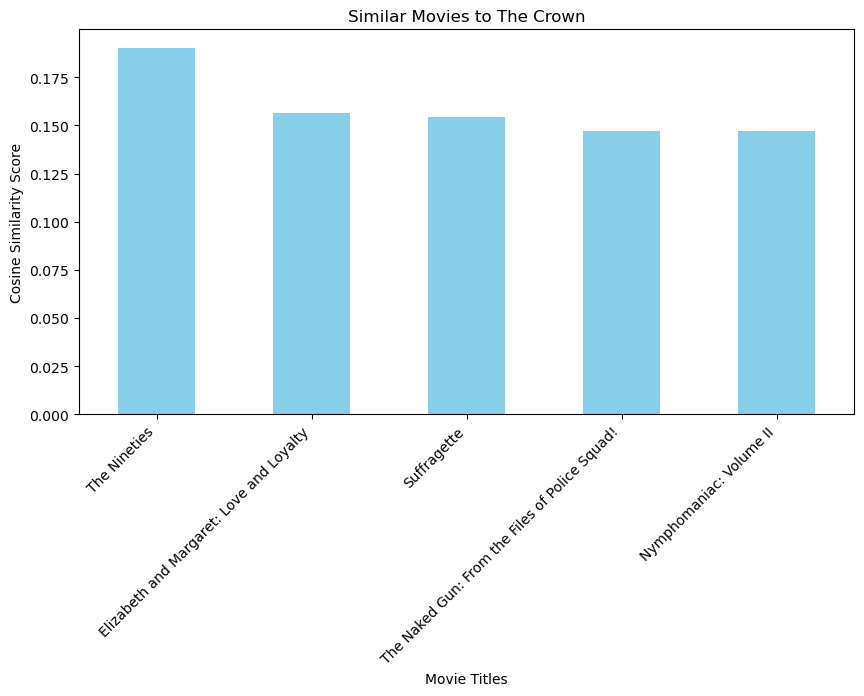

In [40]:
similar_movies = get_similar_movies('The Crown', sim_df)
plot_similar_movies('The Crown', similar_movies)

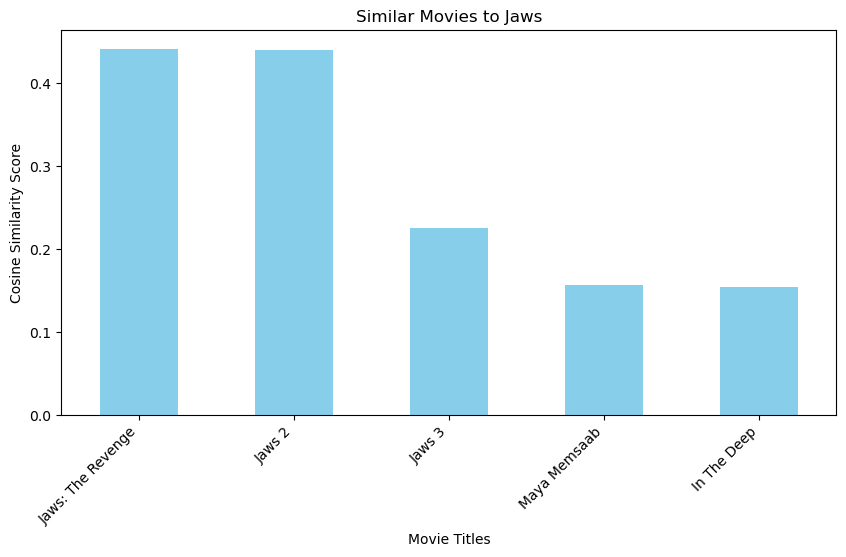

In [42]:
similar_movies = get_similar_movies('Jaws', sim_df)
plot_similar_movies('Jaws', similar_movies)

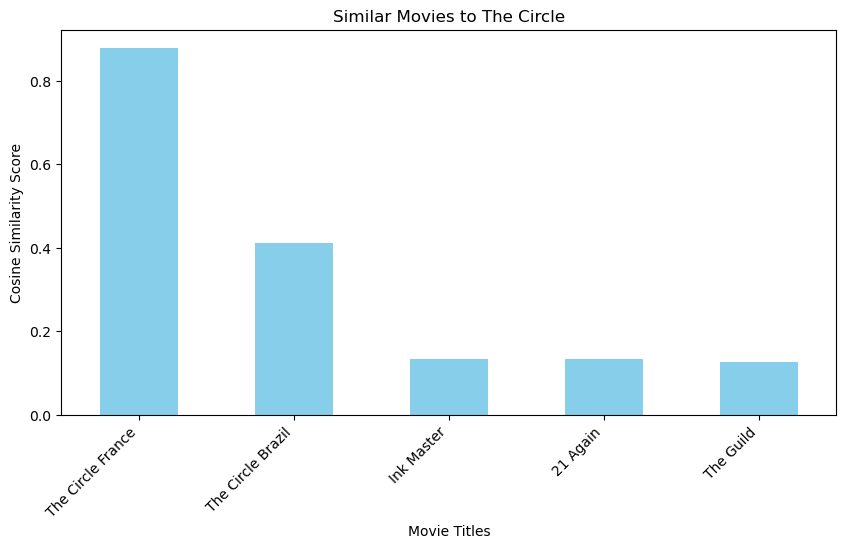

In [43]:
similar_movies = get_similar_movies('The Circle', sim_df)
plot_similar_movies('The Circle', similar_movies)

!TODO Evaluation
Evaluate the model by checking the similarity of movies manually and see if the results make sense. Can also consider using metrics like precision and recall if  create a ground truth for testing.

!TODO Deployment (Optional)
If you want to take it a step further, consider deploying your model as a web application using Flask or Streamlit, allowing users to input a movie title and get similar movies as output.